### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

- Independent variable is 'word types (congruent, incongruent)'.
- Dependent variable is 'the time of response'.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

#### I set null and alternative hypothesis as follows:
- Null hypothesis: 'the average time to complete the task of congruent words condition is equal to or less than the average time of complenting incongruent words condition from this dataset.'
- Alternative hypothesis: 'the average time to complete the task of incongruent words condition is greater than the average time of complenting congruent words condition from this dataset.'

$$H_0: \mu_{Inc} \leq \mu_{Con}$$

$$H_1: \mu_{Inc} > \mu_{Con}$$

To analyse the hypothesis, we compute the observed difference between the mean of congruent and incongruent condition, simulate the sampling distribution and the distribution under the null hypothesis, and compute p-value to determine the statistical significance of the observed difference.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [2]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


In [3]:
(df['Congruent'].max()-df['Congruent'].min()), (df['Incongruent'].max()-df['Incongruent'].min())

(13.698000000000002, 19.568000000000001)

In [4]:
(df['Congruent'].quantile(0.75)-df['Congruent'].quantile(0.25)), (df['Incongruent'].quantile(0.75)-df['Incongruent'].quantile(0.25))

(4.3054999999999986, 5.33475)

In [5]:
df['Congruent'].var(), df['Incongruent'].var()

(12.669029070652176, 23.011757036231884)

#### The following is descriptive statistics data of this data set:
- The mean of Congruent:14.0511, Incongruent:22.01592
- The range of Congruent:13.698, Incongruent:19.568
- The interquartile range of Congruent:4.3055, Incongruent:5.3348
- The variance of Congruent:12.6690, Incongruent:23.0118
- The standard deviation of Congruent:3.5594, Incongruent:4.7971

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

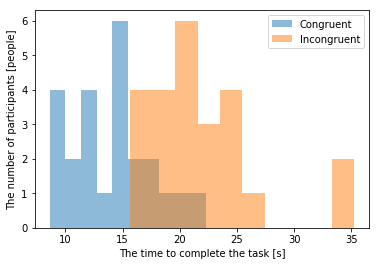

In [6]:
# Build the visualizations here
plt.hist(df['Congruent'], alpha=0.5, label='Congruent')
plt.hist(df['Incongruent'], alpha=0.5, label='Incongruent')
plt.xlabel('The time to complete the task [s]')
plt.ylabel('The number of participants [people]')
plt.legend(loc='upper right')
plt.show()

- Both data are not normally distributed.
- The distribution of incongruent words condition is skewed right.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [7]:
# Compute observed difference in the average completion time 
obs_diff = df['Incongruent'].mean() - df['Congruent'].mean()

# Display observed difference in the average completion time
obs_diff

7.9647916666666667

In [8]:
# Create sampling distribution for difference in the average completion time with boostrapping
diffs = []
size = df.shape[0]
for _ in range(10000):
    b_samp = df.sample(size, replace=True)
    incongruent_time = b_samp['Incongruent'].mean()
    congruent_time = b_samp['Congruent'].mean()
    diffs.append(incongruent_time - congruent_time)

In [9]:
# convert to numpy array
diffs = np.array(diffs)

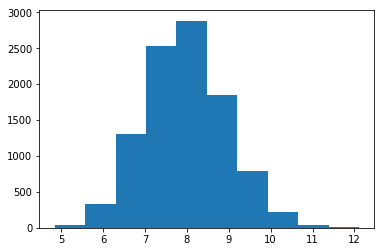

In [10]:
# plot distribution
plt.hist(diffs);

In [11]:
# create distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

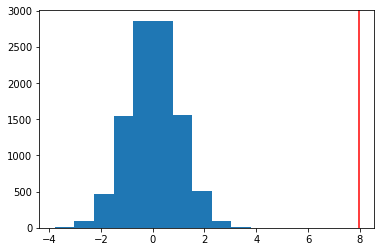

In [12]:
# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(obs_diff, color='red')

In [13]:
# compute p value
p_val = (obs_diff < null_vals).mean()
p_val

0.0

As a result of p-value, we can say followings.
- we reject the null hypothesis and accept alternative hypothesis, that is, 'the average time to complete the task of incongruent words condition is greater than the average time of complenting congruent words condition from this dataset.'

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

--write answer here--